In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [7]:
path = untar_data(URLs.MNIST_TINY);
path
# path.ls()

PosixPath('/home/jupyter/.fastai/data/mnist_tiny')

In [22]:
df = pd.read_csv(path/'labels.csv', header='infer')
df

,name,label
0,train/3/7463.png,3
1,train/3/9829.png,3
2,train/3/7881.png,3
3,train/3/8065.png,3
4,train/3/7046.png,3
...,...,...
1403,valid/7/8718.png,7
1404,valid/7/7734.png,7
1405,valid/7/0.png,7
1406,valid/7/8282.png,7


In [24]:
# tfms = get_transforms(do_flip=False)

print(df)
data_bunch = (ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=32, bs=bs)
    .normalize(imagenet_stats)
)

data_bunch


                  name  label
0     train/3/7463.png      3
1     train/3/9829.png      3
2     train/3/7881.png      3
3     train/3/8065.png      3
4     train/3/7046.png      3
...                ...    ...
1403  valid/7/8718.png      7
1404  valid/7/7734.png      7
1405     valid/7/0.png      7
1406  valid/7/8282.png      7
1407  valid/7/7149.png      7

[1408 rows x 2 columns]


ImageDataBunch;

Train: LabelList (1127 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
3,3,3,3,3
Path: /home/jupyter/.fastai/data/mnist_tiny;

Valid: LabelList (281 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
3,7,7,7,7
Path: /home/jupyter/.fastai/data/mnist_tiny;

Test: None

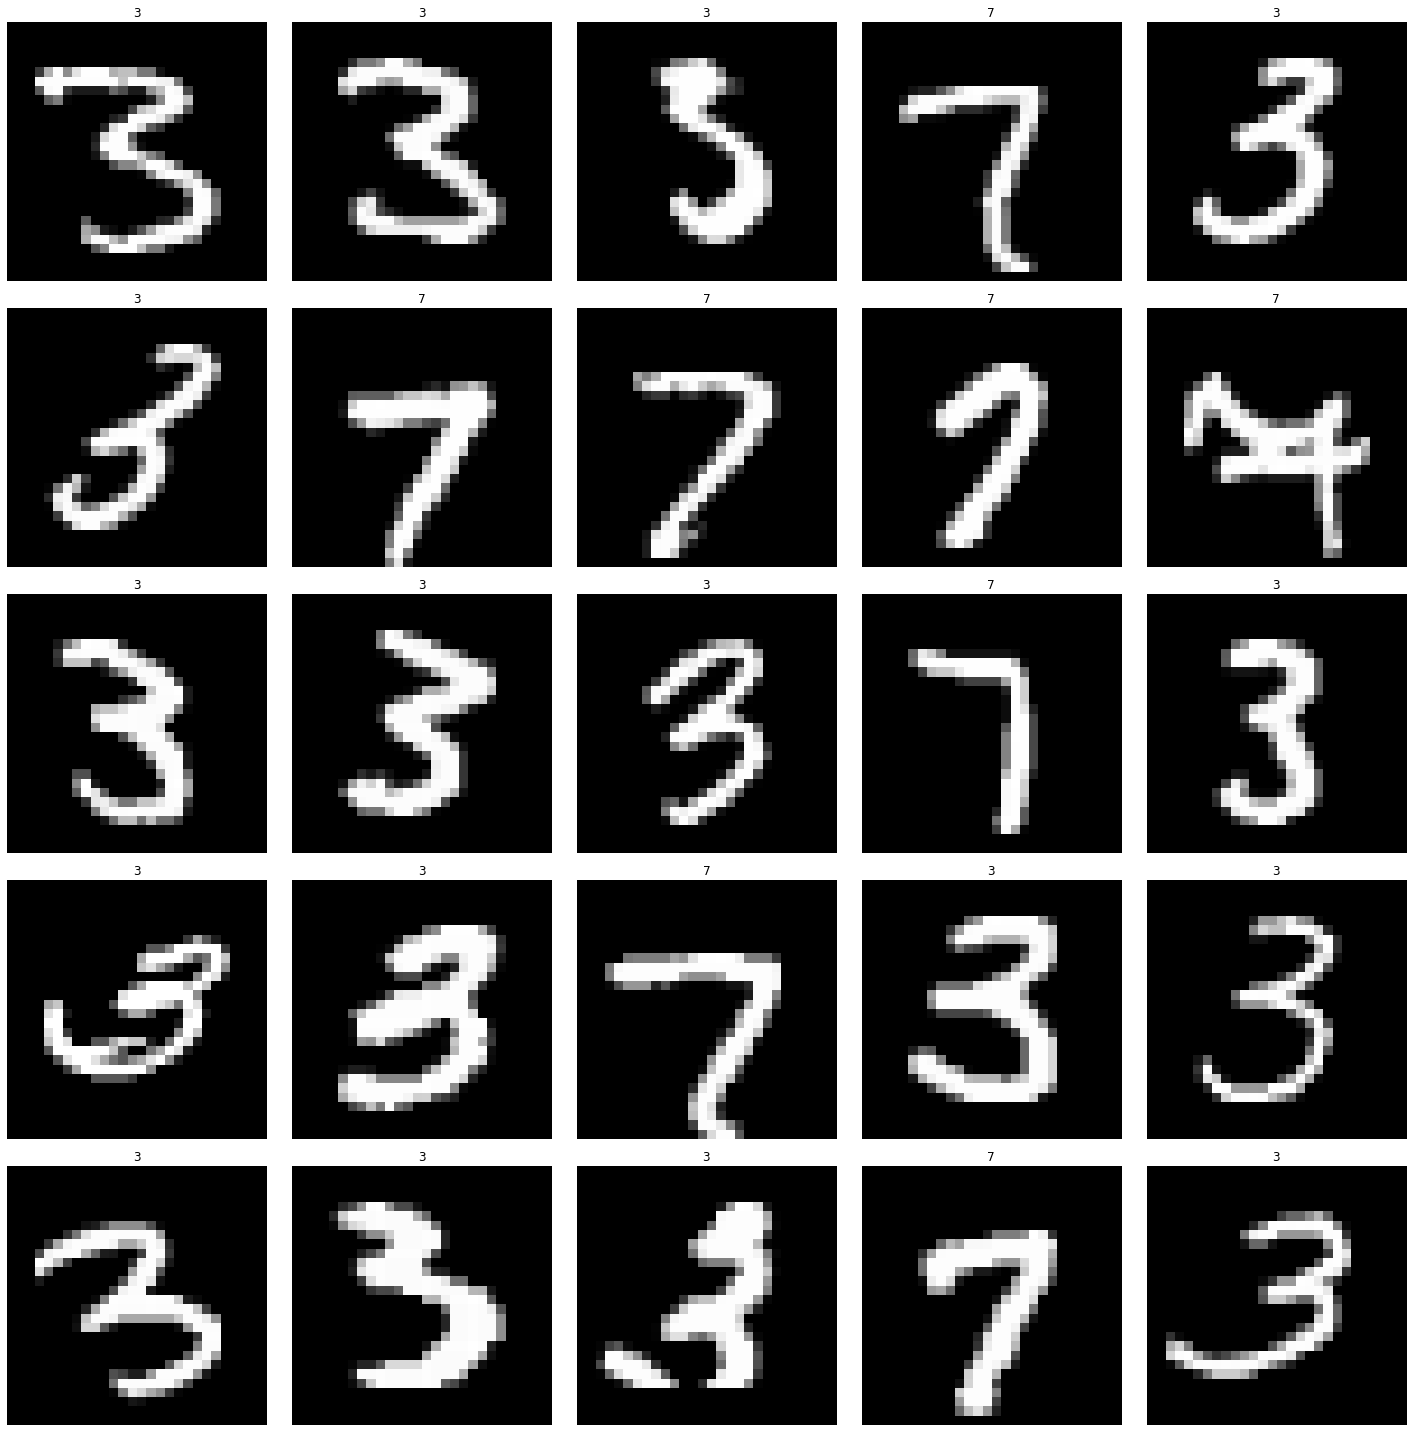

In [9]:
data_bunch.show_batch()

In [39]:
learn = cnn_learner(data_bunch, models.resnet34, metrics=error_rate)

In [44]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [45]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.172708,0.134574,0.046263,00:01
1,0.190547,0.133059,0.042705,00:01
2,0.192216,0.127374,0.046263,00:01
3,0.198320,0.114485,0.035587,00:01
4,0.195877,0.146110,0.042705,00:01
5,0.184058,0.113540,0.032028,00:01
6,0.166794,0.113245,0.032028,00:01
7,0.150965,0.104733,0.035587,00:01


In [47]:
interp = ClassificationInterpretation.from_learner(learn)

In [48]:
losses,idxs = interp.top_losses()

In [32]:
len(data_bunch.valid_ds)==len(losses)==len(idxs)

True

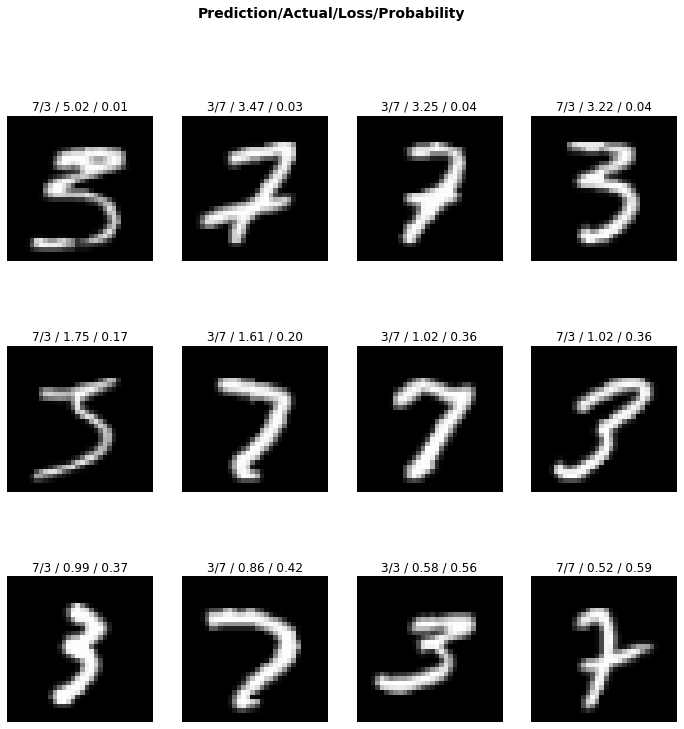

In [49]:
interp.plot_top_losses(12)